In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  6 10:17:20 2019

@author: berar
"""

def create_problem(m,n,scale,x0):
    #centered a
    A = scale*(np.random.rand(n,m)-.5)
    b = x0@A + 5*scale*np.random.rand(m)
    c = (np.random.rand(n)-.5)
    return A,b,c

In [79]:
x0=np.ones(2)
a,b,c=create_problem(500,2,2,x0)

In [80]:
def cost(x):
    tmp=b-a.T@x
    if np.all(tmp>=0):     
       return c.T@x-np.log(b-a.T@x).sum() 
    else:
        return np.inf 

In [81]:
def gradient(x):
    return c+a@(1/(b-a.T@x)) if np.all((b-a.T@x)>0) else np.inf

In [82]:
def backtrak(x_k,d,sig):
    rho=0.4
    c=1e-4
    f_x=cost(x_k)
    while(cost(x_k+sig*d)>f_x-c*sig*d@d) :
        sig=sig*rho
    return sig

In [83]:
def metho_Golden(f,a,b,epsilon=1e-4):
    fi=((1+np.sqrt(5))/2)+1
    c=a+(b-a)/(fi)
    d=b-(b-a)/(fi)
    while b - a > epsilon:
            c = a + (b - a) / fi
            d = b - (b - a) /fi
            if f(c) < f(d):
                b = d
            else:
                a = c
    return (a + b) / 2

In [84]:
#Choice methode backtack or golden_search or fix point
def choice_methode(x_0,d_k,sig,type):
    if type=="backtrack":
         return backtrak(x_0,d_k,sig)
    elif type=="golden":
        return metho_Golden(lambda sigma : cost(x_0 -sigma*d_k),0,.1)
    else:
        return 1e-5

def ajouter_xlist_flist(xlist,flist,nlist,x_0):
    nlist.append(np.linalg.norm(gradient(x_0)))
    xlist.append(x_0)
    flist.append(cost(x_0))
    
def methode_desscente(x_0,cost,gradient,type,epsilon=1e-6,max_iter=1e5,rho=1e-3,c_=1e-4,sig=2):
    k=0
    xlist=[]
    flist=[]
    nlist=[]
    ajouter_xlist_flist(xlist,flist,nlist,x_0)
    d_k=-gradient(x_0)
    step=choice_methode(x_0,d_k,sig,type)
    x_0=x_0+step*d_k
    k=k+1
    ajouter_xlist_flist(xlist,flist,nlist,x_0)
    while np.abs(flist[-2]-flist[-1])>epsilon and k<max_iter:
        d_k=-gradient(x_0)
        step=choice_methode(x_0,d_k,sig,type)
        x_0=x_0+step*d_k
        
        k=k+1
        ajouter_xlist_flist(xlist,flist,nlist,x_0)
    return xlist,flist,nlist

In [85]:
#grid
def visualiation(x0,cost,gradient,methode,sig):
    ax= x0[0]
    bx = x0[0]
    ay= x0[1]
    by = x0[1]
    
    for test in range(2):
        xlist,flist,nlist =  methode_desscente(x0,cost,gradient,methode,sig=1)
        xlist = np.asarray(xlist)
        #
        plt.figure(figsize=(18,10))
        fig = plt.figure(1) 
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-cost(x0)+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel('Norme du gradient')
        
        
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))
    
    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)
    plt.show()

# Methode Backtracking

<Figure size 1800x1000 with 0 Axes>

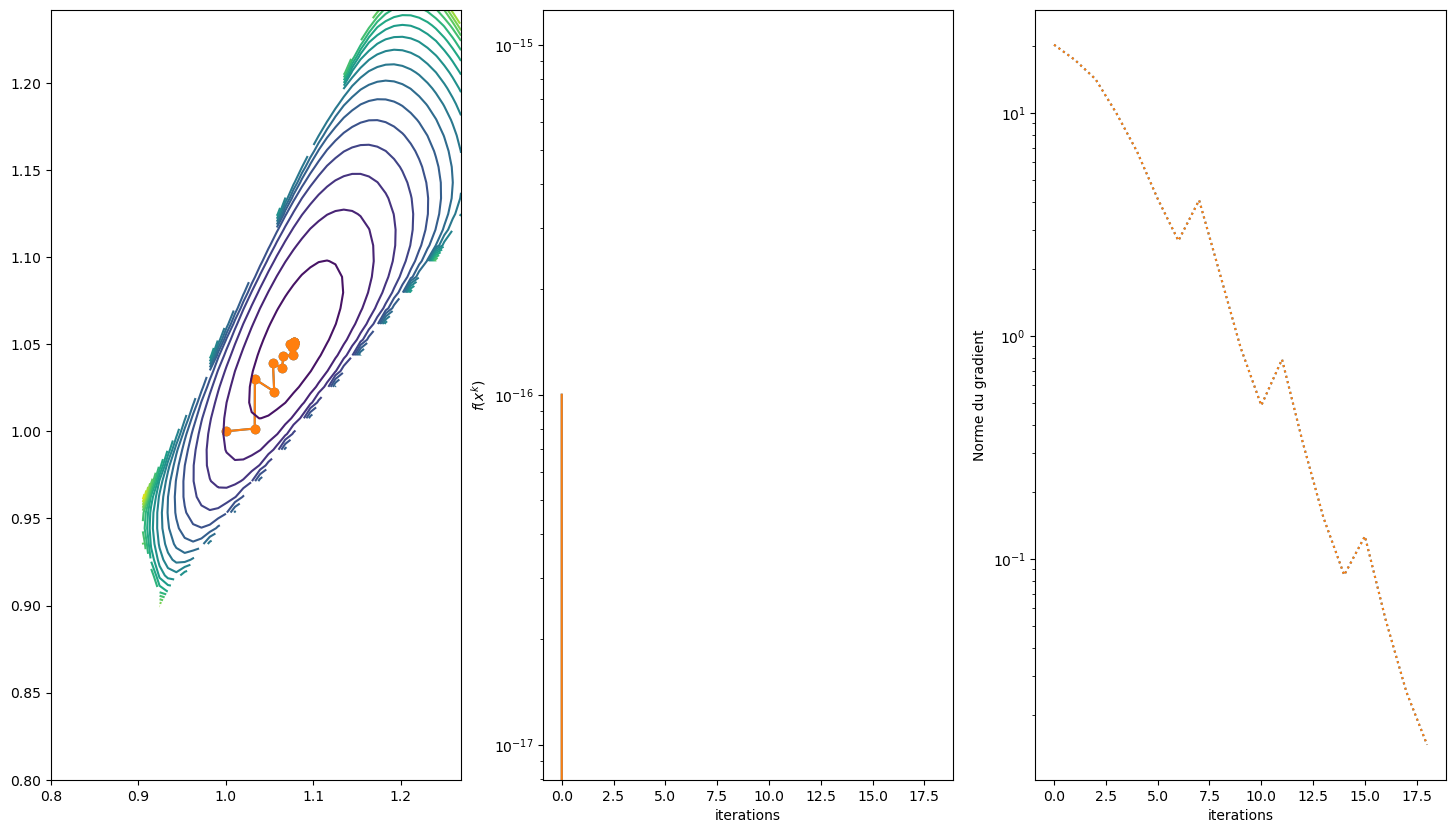

In [86]:
visualiation(x0,cost,gradient,"backtrack",1)

# Methode Point Fixe

<Figure size 1800x1000 with 0 Axes>

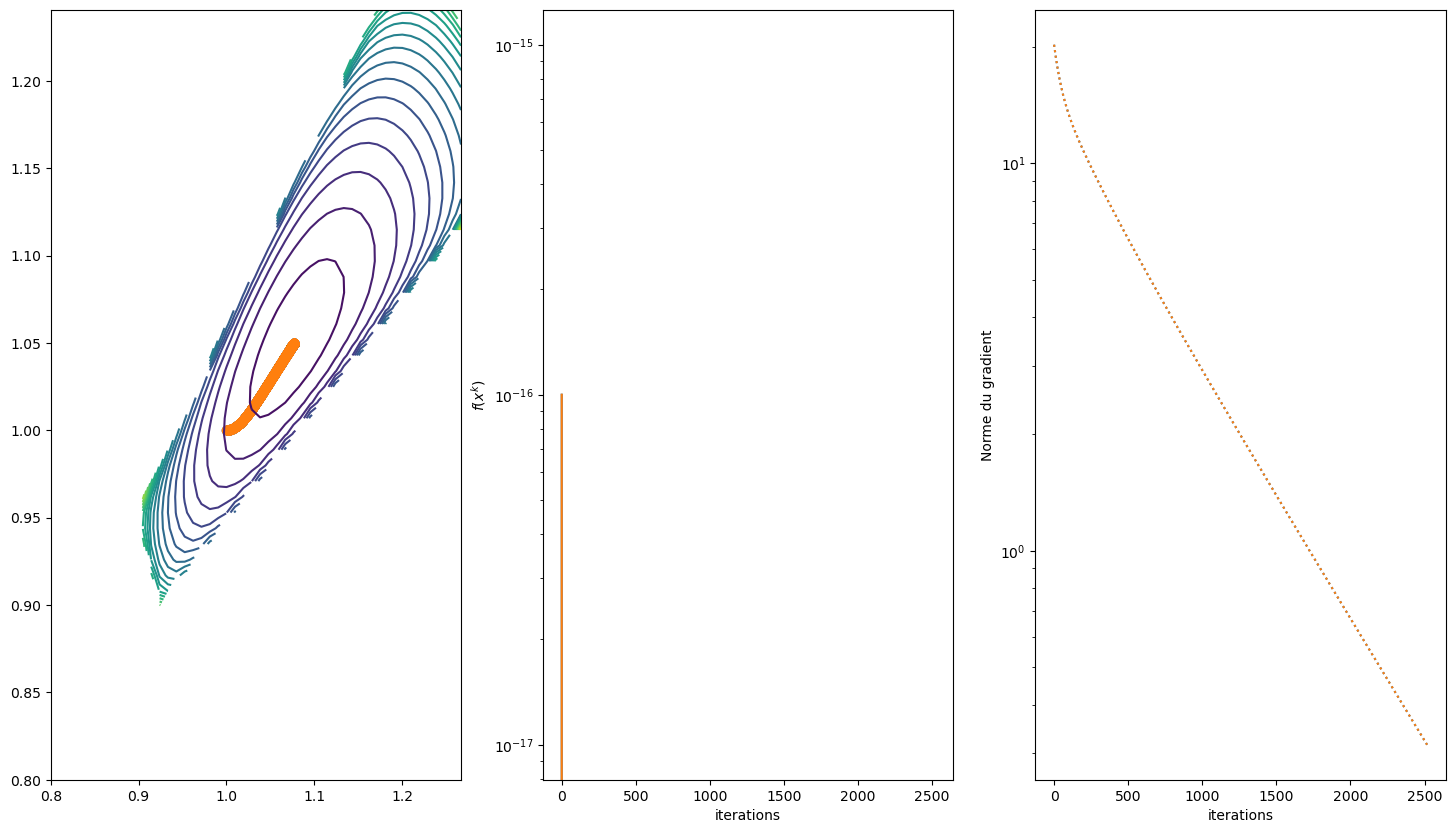

In [87]:
visualiation(x0,cost,gradient,"fixe",1)